In [1]:
# standard libraries
import pandas as pd
import numpy as np

import os
from os import listdir
from os.path import isfile, join

from IPython.display import Image
#from IPython.display import clear_output
#import sklearn
import time
#import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from tabulate import tabulate

# data pre-processing
'''from sklearn.impute._base import _BaseImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection._split import BaseShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
'''
# prediction models
'''from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score'''

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

In [2]:
class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir

In [3]:
class Loader:
    df = pd.DataFrame()
    
    def load_data(self, file_name):
        pass
    
    def get_df(self):
        pass
    
    def size(self):
        return len(self.df)

In [4]:
from typing import Callable
 
class CSVLoader(Loader):
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
        
    def load_data(self, _prepare_data: Callable[[pd.DataFrame], pd.DataFrame] = None):
        self.df = pd.read_csv(self.file_path_manager.retrieve_full_path())
        if _prepare_data:
            self.df = _prepare_data(self.df)
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)  

In [5]:
def clean_data(df):
    df['y'] = df['y'].astype(int)
    #df['x32'] = df['x32'].str.replace('%','').astype(float)
    #df['x37'] = df['x37'].str.replace('$','').astype(float)
    return df

In [6]:
loader = CSVLoader(FilePathManager('final_project(5).csv'))
loader.load_data(clean_data)
df = loader.get_df()

## EDA

In [7]:
df.shape

(160000, 51)

In [8]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [9]:
def target_EDA(target):
    y_barchart = sns.countplot(x = target)
    y_counts = target.value_counts()
    y_pcts = target.value_counts(normalize=True)   
    
    return plt.show(), print("Counts:\n", y_counts), print("\nPercents:\n", y_pcts) 

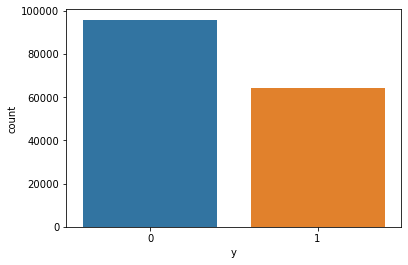

Counts:
 0    95803
1    64197
Name: y, dtype: int64

Percents:
 0    0.598769
1    0.401231
Name: y, dtype: float64


(None, None, None)

In [10]:
target_EDA(df['y'])

### Missing Values & Data Types
- Minimal missing values, <= 0.03% of feature data.  No missing values for target response.
- Five features were read in as object (string) data types, the rest are float64 (continuous)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

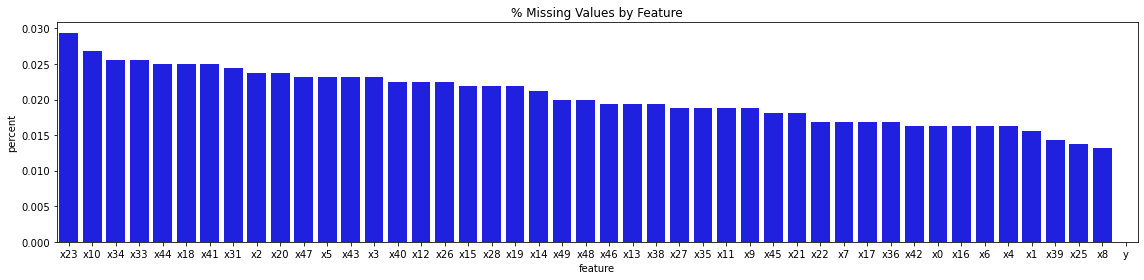

In [12]:
pct_missing = ( df.shape[0] - df.describe().T['count'] )/df.shape[0]*100
pct_missing = pct_missing.sort_values(ascending=False).reset_index()
pct_missing.columns = ['feature', 'count']

plt.figure(figsize=(16, 4))
sns.barplot(data=pct_missing, x='feature', y='count', color='blue')
plt.ylabel('percent')
plt.title("% Missing Values by Feature")
plt.tight_layout() 
plt.show()

#### Continuous features need to be centered and scaled

In [13]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


#### Only three features are truly object (string) data types: x24, x29, x30.  

In [14]:
cont_vars = df.describe().columns
cat_vars = set(df.columns) - set(cont_vars)
df[cat_vars].describe()

,x24,x37,x30,x32,x29
count,159972,159977,159970,159969,159970
unique,3,129198,5,12,12
top,asia,$237.4,wednesday,0.01%,July
freq,138965,6,101535,40767,45569


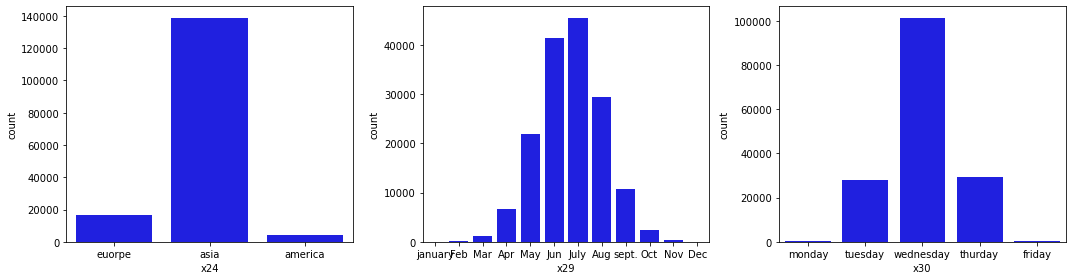

In [15]:
fig, axis = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(ax=axis[0], x = df['x24'], color='blue')
sns.countplot(ax=axis[1], x = df['x29'], color='blue',
              order=['january', 'Feb', 'Mar','Apr','May','Jun','July','Aug','sept.', 'Oct','Nov','Dec'])
sns.countplot(ax=axis[2], x = df['x30'], order=['monday','tuesday','wednesday','thurday','friday'], color='blue')
fig.tight_layout() 

#### No big shifts in target response between categorical features
Likely not strong predictors

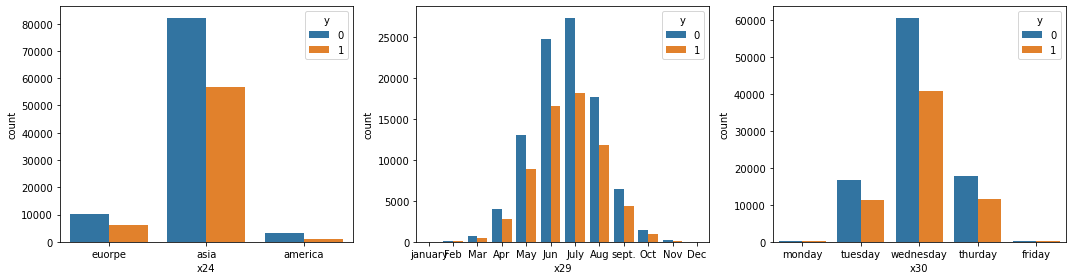

In [16]:
fig, axis = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(ax=axis[0], data = df, x = 'x24', hue='y')
sns.countplot(ax=axis[1], data = df, x = 'x29', hue='y',
              order=['january', 'Feb', 'Mar','Apr','May','Jun','July','Aug','sept.', 'Oct','Nov','Dec'])
sns.countplot(ax=axis[2], data = df, x = 'x30', hue='y', order=['monday','tuesday','wednesday','thurday','friday'])
fig.tight_layout()

#### Features x32 and x37 need to be recoded as float

In [17]:
df['x32'] = df['x32'].str.replace('%','').astype(float)
df['x37'] = df['x37'].str.replace('$','').astype(float)

<ipython-input-17-75fa64bb7d1c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['x37'] = df['x37'].str.replace('$','').astype(float)


In [18]:
df.loc[:,['x32','x37']].describe()

,x32,x37
count,159969.000000,159977.000000
mean,-0.000011,0.377628
std,0.010400,999.945334
min,-0.050000,-4734.540000
25%,-0.010000,-691.370000
50%,0.000000,-13.760000
75%,0.010000,664.210000
max,0.050000,5546.990000


In [19]:
cont_vars = list(cont_vars)
cont_vars.pop() # remove 'y'
cont_vars.append('x32')
cont_vars.append('x37')
np.array(cont_vars)

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31',
       'x33', 'x34', 'x35', 'x36', 'x38', 'x39', 'x40', 'x41', 'x42',
       'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x32', 'x37'],
      dtype='<U3')

In [20]:
len(cont_vars)

47

### Skewness & Outliers
Features are not skewed and no major outliers are present.  Scale the data and proceed.

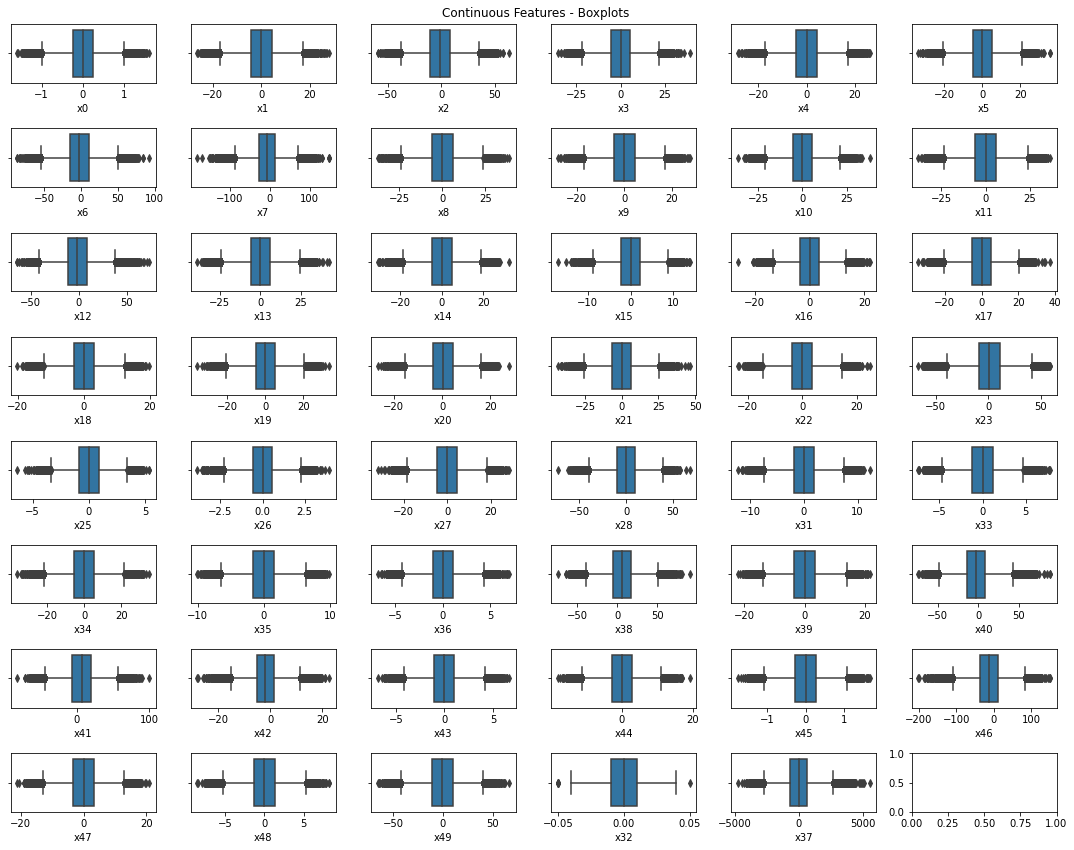

In [21]:
rows = 8
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle('Continuous Features - Boxplots')
for i,j in zip(cont_vars, range(47)):
    sns.boxplot(ax = axes[int(j/cols), j%cols], x = df[i])

fig.tight_layout()

### Mean differences in features vs. target response
Several features show promise for classifying the target response: x2, x6, x7, x12, x20, x23, x37, x38, x40, x41, x42, x46, x49

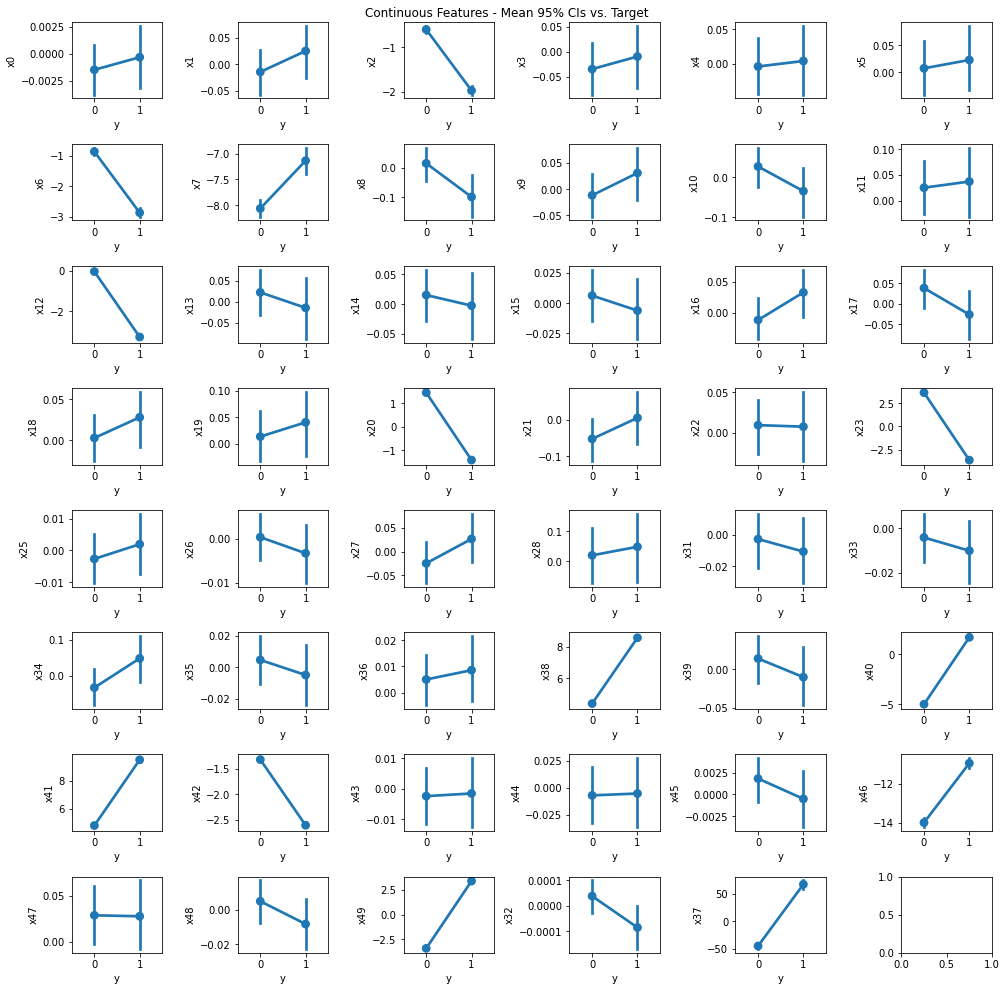

In [22]:
rows = 8
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
fig.suptitle('Continuous Features - Mean 95% CIs vs. Target')
for i,j in zip(cont_vars, range(47)):
    sns.pointplot(ax = axes[int(j/cols), j%cols], data = df, y = i, x='y')

fig.tight_layout()

In [23]:
df.corr()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
x0,1.000000,-0.001762,0.001054,-0.003347,0.000938,0.000515,0.001090,0.003813,-0.003185,-0.001663,...,0.000076,0.002238,0.001707,0.005155,-0.002414,0.000436,-0.001485,-0.000322,0.002573,0.001545
x1,-0.001762,1.000000,-0.003227,-0.000870,-0.003739,-0.001800,-0.003260,-0.002669,0.002052,-0.004766,...,0.004152,-0.001677,0.000460,-0.000892,0.001338,-0.002839,-0.000497,0.005005,0.001743,0.003056
x2,0.001054,-0.003227,1.000000,-0.000069,0.003593,0.002357,1.000000,0.203527,-0.001965,0.000909,...,0.394772,0.390237,-0.000287,0.001962,-0.000465,0.000577,-0.001906,-0.356317,-0.324770,-0.050527
x3,-0.003347,-0.000870,-0.000069,1.000000,-0.002474,-0.000743,-0.000090,-0.000701,-0.001605,-0.001465,...,0.001416,0.002441,-0.000875,-0.002667,-0.001454,0.000496,0.001280,0.000661,0.002360,0.001533
x4,0.000938,-0.003739,0.003593,-0.002474,1.000000,-0.003143,0.003441,0.002896,-0.001187,-0.003394,...,0.000493,-0.001972,0.001646,0.001707,-0.000784,-0.004266,0.000874,-0.004762,-0.004933,0.000608
x5,0.000515,-0.001800,0.002357,-0.000743,-0.003143,1.000000,0.002465,0.001143,0.002379,0.001153,...,0.003748,-0.001103,0.005655,0.005454,0.004911,-0.000186,0.004146,0.001479,0.000332,0.000985
x6,0.001090,-0.003260,1.000000,-0.000090,0.003441,0.002465,1.000000,0.203570,-0.001999,0.001015,...,0.394790,0.390189,-0.000238,0.002051,-0.000435,0.000508,-0.001784,-0.356302,-0.324782,-0.050504
x7,0.003813,-0.002669,0.203527,-0.000701,0.002896,0.001143,0.203570,1.000000,-0.006372,-0.001513,...,-0.486345,0.320260,0.000613,-0.003901,-0.001686,-0.264460,-0.004005,0.009407,-0.032373,0.014935
x8,-0.003185,0.002052,-0.001965,-0.001605,-0.001187,0.002379,-0.001999,-0.006372,1.000000,-0.001184,...,-0.000189,-0.000166,0.000073,-0.000303,0.000080,0.003741,0.001664,-0.001273,-0.003424,-0.006222
x9,-0.001663,-0.004766,0.000909,-0.001465,-0.003394,0.001153,0.001015,-0.001513,-0.001184,1.000000,...,0.003812,-0.000691,-0.002638,-0.000863,0.003342,0.004094,0.001207,0.002553,0.005698,0.003286


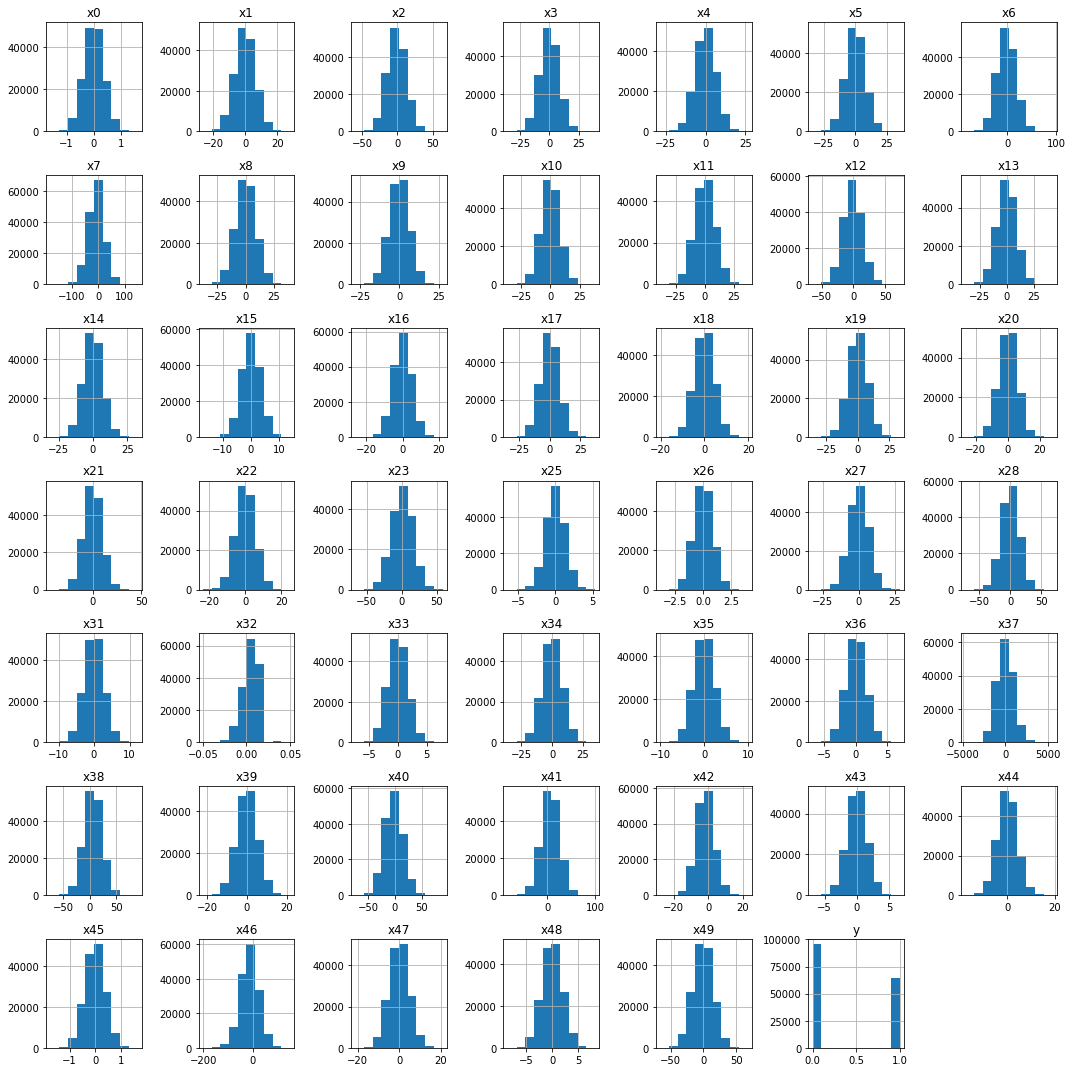

In [24]:
df.hist(figsize=(15,15)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

In [25]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [26]:
Cont_x24 = df['x24']
print(Cont_x24.value_counts())

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64


In [27]:
#fix Europe
df["x24"]= df["x24"].astype(str)
df["x24"]= df["x24"].str.replace('euorpe','europe')

In [28]:
Cont_x24 = df['x24']
print(Cont_x24.value_counts())

asia       138965
europe      16538
america      4469
nan            28
Name: x24, dtype: int64


In [29]:
Cont_x29 = df['x29']
print(Cont_x29.value_counts())

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64


In [30]:
#Fix months for consistency
df["x29"]= df["x29"].astype(str)
df["x29"]= df["x29"].str.replace('sept.','Sep')
df["x29"]= df["x29"].str.replace('January','Jan')
df["x29"]= df["x29"].str.replace('Dev','Dec')
df["x29"]= df["x29"].str.replace('July','Jul')

<ipython-input-30-165979db536a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["x29"]= df["x29"].str.replace('sept.','Sep')


In [31]:
Cont_x29 = df['x29']
print(Cont_x29.value_counts())

Jul    45569
Jun    41329
Aug    29406
May    21939
Sep    10819
Apr     6761
Oct     2407
Mar     1231
Nov      337
Feb      140
nan       30
Dec       23
Jan        9
Name: x29, dtype: int64


In [32]:
Cont_x30 = df['x30']
print(Cont_x30.value_counts())

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64


In [33]:
#fix days of week
df["x30"]= df["x30"].astype(str)
df["x30"]= df["x30"].str.replace('thurday','thursday')

In [34]:
Cont_x30 = df['x30']
print(Cont_x30.value_counts())

wednesday    101535
thursday      29429
tuesday       27954
friday          564
monday          488
nan              30
Name: x30, dtype: int64


In [35]:
Cont_x32 = df['x32']
print(Cont_x32.value_counts())

 0.00    64415
 0.01    40767
-0.01    34094
-0.02     9924
 0.02     7987
-0.03     1727
 0.03      855
-0.04      138
 0.04       55
-0.05        6
 0.05        1
Name: x32, dtype: int64


In [36]:
Cont_x37 = df['x37']
print(Cont_x37.value_counts())

-311.26     6
-415.46     6
 341.26     6
 618.22     6
 72.42      6
           ..
-125.39     1
-1765.47    1
 622.64     1
-1173.26    1
-1307.07    1
Name: x37, Length: 129198, dtype: int64


x24,x29 and x30 object type columns appear to be continents, months, and days of the weekrespectively. x32 andx37 have special characters in the data; a "%" in x32 and a "$" in x37. for x32 and x37 special characters can be removed and columns can be changed to numeric.

In [37]:
#remove $ and % characters
df["x32"]= df["x32"].astype(str)
df["x32"]= df["x32"].str.replace('%','')

df["x37"]= df["x37"].astype(str)
df["x37"]= df["x37"].str.replace('$','')

df["x32"] = pd.to_numeric(df["x32"],errors='coerce')
df["x37"] = pd.to_numeric(df["x37"],errors='coerce')

<ipython-input-37-1dba29e7ec40>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["x37"]= df["x37"].str.replace('$','')


# Missing Values

<AxesSubplot:>

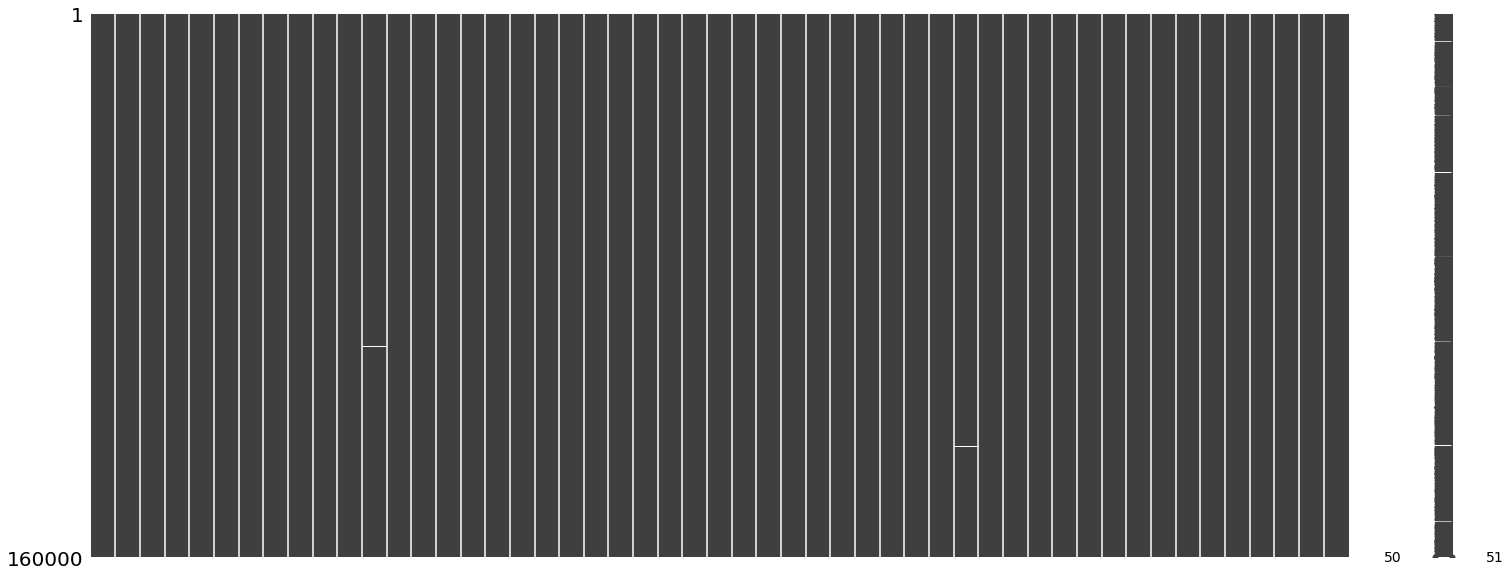

In [41]:
import missingno as msno
msno.matrix(df)

Text(0.5, 1.0, 'Missing Value Counts')

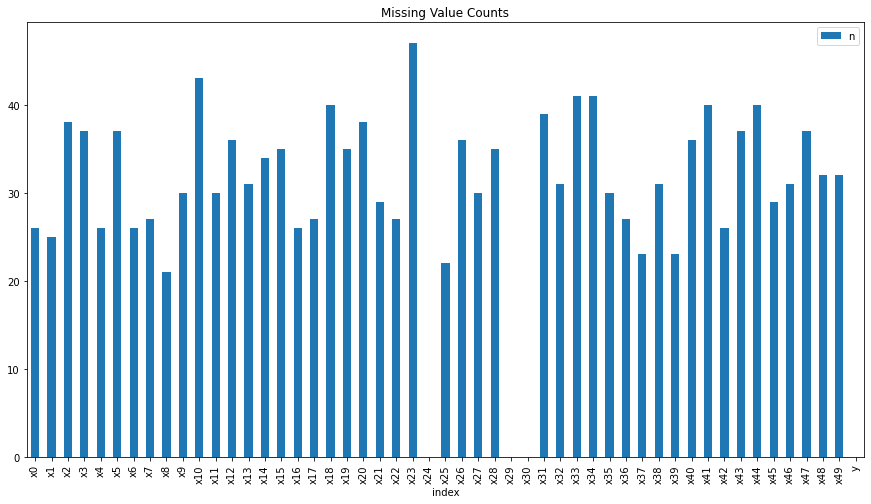

In [42]:
#plot missing values
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=90, figsize = (15,8)).set_title('Missing Value Counts')

Numerical missing variable will be replaced with mean aand categorical will be replaced with mode(the most common value)

In [43]:
#categorical missing values
print("Missing Values in Continent: ",df.x24.value_counts().nan)
print("Missing Values in Month: ",df.x29.value_counts().nan)
print("Missing Values in Day: ",df.x30.value_counts().nan)

Missing Values in Continent:  28
Missing Values in Month:  30
Missing Values in Day:  30


In [44]:
#replace Categorical Missing values with the mode (the most common are listed above in the value counts)
df['x24'] = df['x24'].str.replace('nan','asia')
df['x29'] = df['x29'].str.replace('nan','Jul')
df['x30'] = df['x30'].str.replace('nan','wednesday')

In [45]:
#replace numeric Missing Values with the mean
for col in df.columns.difference(['x24','x29','x30', 'y']): 
    df[col].fillna(value=df[col].mean(), inplace=True)


In [46]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      160000 non-null  float64
 1   x1      160000 non-null  float64
 2   x2      160000 non-null  float64
 3   x3      160000 non-null  float64
 4   x4      160000 non-null  float64
 5   x5      160000 non-null  float64
 6   x6      160000 non-null  float64
 7   x7      160000 non-null  float64
 8   x8      160000 non-null  float64
 9   x9      160000 non-null  float64
 10  x10     160000 non-null  float64
 11  x11     160000 non-null  float64
 12  x12     160000 non-null  float64
 13  x13     160000 non-null  float64
 14  x14     160000 non-null  float64
 15  x15     160000 non-null  float64
 16  x16     160000 non-null  float64
 17  x17     160000 non-null  float64
 18  x18     160000 non-null  float64
 19  x19     160000 non-null  float64
 20  x20     160000 non-null  float64
 21  x21     16

# Numeric Variable Exploration

In [47]:
#summary stats
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371107,6.340137,13.271904,8.064099,6.381775,7.669189,19.297096,30.539687,8.900601,6.354444,...,18.677861,5.110290,1.534775,4.164075,0.396585,36.605095,4.787604,1.935308,15.035234,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251574,-4.260377,-10.163721,-5.452183,-4.312029,-5.147177,-14.777287,-27.318385,-6.030219,-4.259907,...,-5.801423,-5.162268,-1.039482,-2.811242,-0.266411,-36.425835,-3.214765,-1.320470,-10.930261,0.000000
50%,-0.001980,0.004056,-1.336542,-0.028386,-0.000105,0.013582,-1.943830,-6.961396,-0.018784,0.005462,...,6.835074,-1.923107,-0.004096,-0.009104,0.001542,-12.973676,0.034732,-0.011225,-0.577987,0.000000
75%,0.248505,4.282958,7.868661,5.443760,4.305730,5.188709,11.444045,12.213263,5.971778,4.305071,...,19.263639,1.452664,1.032992,2.782384,0.268985,11.437354,3.266938,1.317397,9.649149,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


<AxesSubplot:>

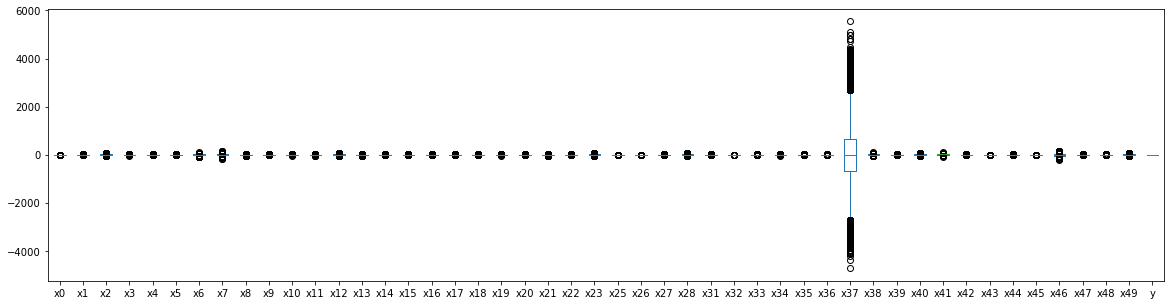

In [48]:
#Boxplots
df.boxplot(vert = True, grid = False, figsize = (20,5))

Boxplots make it obvious that x37 is on a much larger scale than the other variables.

<AxesSubplot:>

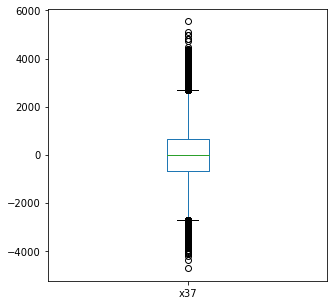

In [49]:
#Boxplots - x37 only
df.boxplot(vert = True, grid = False, figsize = (5,5), column = ['x37'])

<AxesSubplot:>

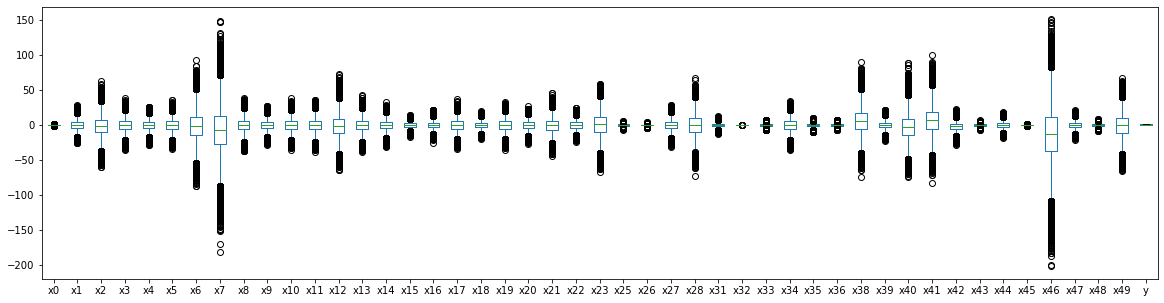

In [50]:
#boxplots excluding x37
df_ex_x37 = df.drop('x37', axis = 1)
df_ex_x37.boxplot(vert = True, grid = False, figsize = (20,5))

<AxesSubplot:>

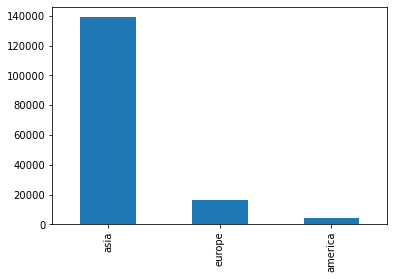

In [51]:
df_cat = df[['x24','x29','x30']]
df_cat['x24'].value_counts().plot(kind='bar')

<AxesSubplot:>

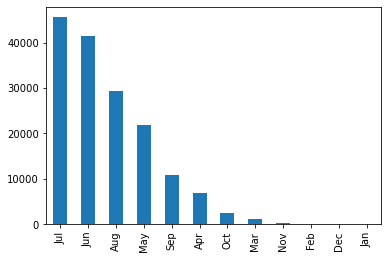

In [52]:
df_cat['x29'].value_counts().plot(kind='bar')

<AxesSubplot:>

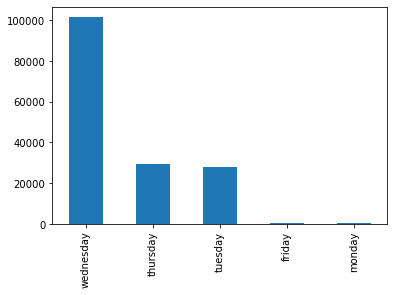

In [53]:
df_cat['x30'].value_counts().plot(kind='bar')

##### One_Hot encoded
The categorical variables will need to be one-hot encoded to create binary features for use in classification models. Luckily, the three categorical variables only contain a handful of unique values, so this should not create a massive amount of sparsity in the dataset.

In [54]:
# Create new one-hot encoded features using pandas.get_dummies
# from https://datagy.io/pandas-get-dummies/
categorical_columns = ['x24', 'x29', 'x30']

for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_Sep,x30_friday,x30_monday,x30_thursday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0


In [55]:
#New dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 68 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   x0             160000 non-null  float64
 1   x1             160000 non-null  float64
 2   x2             160000 non-null  float64
 3   x3             160000 non-null  float64
 4   x4             160000 non-null  float64
 5   x5             160000 non-null  float64
 6   x6             160000 non-null  float64
 7   x7             160000 non-null  float64
 8   x8             160000 non-null  float64
 9   x9             160000 non-null  float64
 10  x10            160000 non-null  float64
 11  x11            160000 non-null  float64
 12  x12            160000 non-null  float64
 13  x13            160000 non-null  float64
 14  x14            160000 non-null  float64
 15  x15            160000 non-null  float64
 16  x16            160000 non-null  float64
 17  x17            160000 non-nul

# Training and Test Data Split

In [56]:
## split dataset into independent (X) and target (y) variables
y = df['y']
X = df.drop(['y'], axis=1)
print('Size of target vector: ', y.shape)
print('-'*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (160000,)
--------------------------------------------------
Size of explanatory matrix:  (160000, 67)


In [57]:
## Check target counts
print("split between classes:  \n", '-----------------')
print(y.value_counts())

split between classes:  
 -----------------
0    95803
1    64197
Name: y, dtype: int64


In [58]:
## Creating training and test data - 10% witholding for test set (stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

## Test and train set counts - check that stratification was applied
print('Size of explanatory matrix for Training set: ',X_train.shape)
print('Size of explanatory matrix for Test set: ',X_test.shape)

print("Training set split between classes:  \n", '-----------------')
print(y_train.value_counts())

print("Test set split between classes:  \n", '-----------------')
print(y_test.value_counts())

Size of explanatory matrix for Training set:  (112000, 67)
Size of explanatory matrix for Test set:  (48000, 67)
Training set split between classes:  
 -----------------
0    67062
1    44938
Name: y, dtype: int64
Test set split between classes:  
 -----------------
0    28741
1    19259
Name: y, dtype: int64


In [59]:
# Normalize all of the explanatory features with StandardScaler in train and test sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
#X_scaled = StandardScaler().fit_transform(X)

# XGBoost

In [78]:
import xgboost as xgb

In [79]:
X.head

<bound method NDFrame.head of               x0        x1         x2         x3        x4         x5  \
0      -0.166563 -3.961588   4.621113   2.481908 -1.800135   0.804684   
1      -0.149894 -0.585676  27.839856   4.152333  6.426802  -2.426943   
2      -0.321707 -1.429819  12.251561   6.586874 -5.304647 -11.311090   
3      -0.245594  5.076677 -24.149632   3.637307  6.505811   2.290224   
4      -0.273366  0.306326 -11.352593   1.676758  2.928441  -0.616824   
...          ...       ...        ...        ...       ...        ...   
159995 -0.487024 -4.270269   0.417395  -1.992423  1.757552  -1.167819   
159996  0.825477  4.804368  22.161535  11.371303  1.715901   6.990759   
159997 -0.802489  5.362696   7.243419  -7.496074  2.295250  -2.756067   
159998  0.339237  7.609895   5.368414  -2.825481  4.046102  15.322603   
159999 -0.296748 -0.412773 -10.911407  -5.633629 -4.028154  15.939428   

               x6         x7         x8        x9  ...  x29_Mar  x29_May  \
0        6.718751

In [80]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [81]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [82]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_Sep,x30_friday,x30_monday,x30_thursday,x30_tuesday,x30_wednesday
0,0.0,0.0,0.015951,0.0,0.0,0.000522,0.083407,0.036482,0.001387,0.001129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
y_pred = regressor.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
mean_squared_error(y_test, y_pred)

0.10166939640883599

# XGBoost Classifier

In [90]:
# XGBoost Classifier
from xgboost import XGBClassifier
# Classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Pandas datareader to get the data
from pandas_datareader import data
# To plot the graphs
import matplotlib.pyplot as plt
import seaborn as sn
# For data manipulation
import pandas as pd
import numpy as np

In [91]:
# Initialize the model and set the hyperparameter values
model = XGBClassifier(max_depth=2, n_estimators=30, eval_metric='mlogloss')
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [92]:
# Initialize the KFold parameters
kfold = KFold(n_splits=5)
# Perform K-Fold Cross Validation
results = cross_val_score(model, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklea

Accuracy: 78.41% (0.37%)


In [93]:
model.fit(X_train, y_train)

/Users/Amber/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

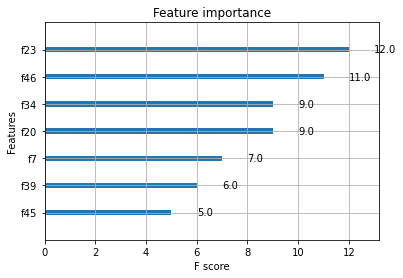

In [89]:
import xgboost
# Plot the top 7 features
xgboost.plot_importance(model, max_num_features=7)
# Show the plot
plt.show()

In [87]:
# Predict the trading signal on test dataset
y_pred = model.predict(X_test)
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83     28741
           1       0.77      0.64      0.70     19259

    accuracy                           0.78     48000
   macro avg       0.78      0.76      0.76     48000
weighted avg       0.78      0.78      0.78     48000



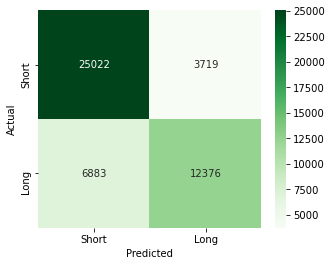

In [88]:
array = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(array, index=['Short', 'Long'], columns=[
'Short', 'Long'])
plt.figure(figsize=(5, 4))
sn.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network Model

In [134]:
#Tensorflow Packages
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import InputLayer

In [238]:
#sequential NN model for classification
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(67,)))
model.add(InputLayer(input_shape=(67,)))
#model.add(layers.Dense(300,activation='relu'))
#model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(100,activation='sigmoid'))
model.add(layers.Dense(50,activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
#https://towardsdatascience.com/neural-network-optimizers-from-scratch-in-python-af76ee087aab

In [230]:
#compile model - use accuracy for binary classification
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [231]:
#fit the model
model.fit(X_train, y_train, epochs=30,validation_data=(X_test,y_test), batch_size=30)

Epoch 1/30
3734/3734 [==============================] - 3s 755us/step - loss: 0.4839 - accuracy: 0.7651 - val_loss: 0.3528 - val_accuracy: 0.8507
Epoch 2/30
3734/3734 [==============================] - 3s 714us/step - loss: 0.3066 - accuracy: 0.8719 - val_loss: 0.2648 - val_accuracy: 0.8917
Epoch 3/30
3734/3734 [==============================] - 3s 729us/step - loss: 0.2345 - accuracy: 0.9070 - val_loss: 0.2241 - val_accuracy: 0.9105
Epoch 4/30
3734/3734 [==============================] - 3s 835us/step - loss: 0.1931 - accuracy: 0.9250 - val_loss: 0.1845 - val_accuracy: 0.9295
Epoch 5/30
3734/3734 [==============================] - 3s 721us/step - loss: 0.1698 - accuracy: 0.9362 - val_loss: 0.1791 - val_accuracy: 0.9310
Epoch 6/30
3734/3734 [==============================] - 3s 734us/step - loss: 0.1562 - accuracy: 0.9417 - val_loss: 0.1606 - val_accuracy: 0.9409
Epoch 7/30
3734/3734 [==============================] - 3s 748us/step - loss: 0.1449 - accuracy: 0.9469 - val_loss: 0.1580 -

In [232]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        multiple                  0         
_________________________________________________________________
dense_92 (Dense)             (None, 100)               6800      
_________________________________________________________________
dense_93 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 51        
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________


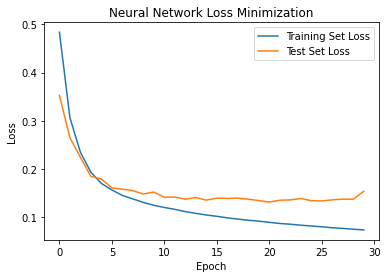

In [233]:
#need labels
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.title('Neural Network Loss Minimization')
plt.plot(train_loss, label='Training Set Loss')
plt.plot(val_loss, label='Test Set Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

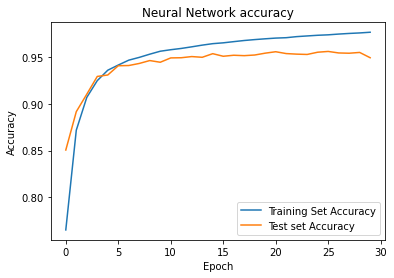

In [234]:
#need labels
train_acc = model.history.history['accuracy']
val_acc= model.history.history['val_accuracy']
plt.title('Neural Network accuracy')
plt.plot(train_acc, label='Training Set Accuracy')
plt.plot(val_acc, label='Test set Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [235]:
model.evaluate(X_train, y_train)

3500/3500 [==============================] - 3s 775us/step - loss: 0.0786 - accuracy: 0.97291s - loss: - ETA: 0s - loss: 0.0775 - accuracy - ETA: 0s - loss: 0.0782 - accura - ETA: 0s - loss: 0.0783 - accuracy: 


[0.0785788893699646, 0.9728928804397583]

In [236]:
model.evaluate(X_test, y_test)

1500/1500 [==============================] - 1s 737us/step - loss: 0.1536 - accuracy: 0.94950s


[0.15361560881137848, 0.9495208263397217]

# Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

In [164]:
#Logistic Regression Model
lr_model = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', random_state = 1) 
lr_model.fit(X_train,y_train)
preds = lr_model.predict(X_test)
acc = mt.accuracy_score(y_test,preds)
print("accuracy: ", acc)

accuracy:  0.7060625
